In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import uncertainty_wizard as uwiz
uwiz.models.ensemble_utils.DynamicGpuGrowthContextManager.enable_dynamic_gpu_growth()

Training data:        (60000, 28, 28)
Training solution:    (60000,)
Test data:            (10000, 28, 28)
Test solution:        (10000,)


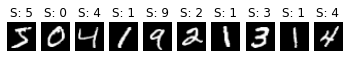

Training data:        (60000, 28, 28, 1)
Training solution:    (60000, 10)
Test data:            (10000, 28, 28, 1)
Test solution:        (10000, 10)


In [8]:


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

fig, axes = plt.subplots(1, 10)
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f"S: {y_train[i]}")
    axes[i].axis('off')
plt.show()

x_train = (x_train.astype('float32') / 255).reshape(x_train.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_test = (x_test.astype('float32') / 255).reshape(x_test.shape[0], 28, 28, 1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)      #??????????

print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)


* functions (imshow) from Matplotlib Documentation. REF: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

* Adding a new dimension(1) for train and test, because the color is just black or white and no extra color.
* Divide with 255 so we can change the (0 - 255) to (0 or 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 118us/sample - loss: 2.2479 - acc: 0.2508 - val_loss: 2.1493 - val_acc: 0.5465
Epoch 2/20
54000/54000 [==============================] - 6s 116us/sample - loss: 2.0498 - acc: 0.5354 - val_loss: 1.8369 - val_acc: 0.7063
Epoch 3/20
54000/54000 [==============================] - 6s 116us/sample - loss: 1.6638 - acc: 0.6762 - val_loss: 1.3204 - val_acc: 0.8027
Epoch 4/20
54000/54000 [==============================] - 6s 118us/sample - loss: 1.1820 - acc: 0.7467 - val_loss: 0.8636 - val_acc: 0.8387
Epoch 5/20
54000/54000 [==============================] - 6s 119us/sample - loss: 0.8564 - acc: 0.7816 - val_loss: 0.6180 - val_acc: 0.8672
Epoch 6/20
54000/54000 [==============================] - 6s 120us/sample - loss: 0.6917 - acc: 0.8080 - val_loss: 0.4952 - val_acc: 0.8830
Epoch 7/20
54000/54000 [==============================] - 7s 122us/sample - loss: 0.5986 - acc: 0.8254 - val_lo

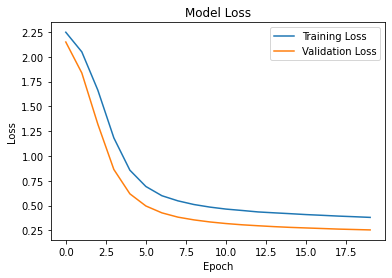

In [6]:

# model = tf.keras.models.Sequential()
model = uwiz.models.StochasticSequential()

# model.add(tf.keras.layers.Conv2D(filters, kernel_size=(size), activation='methods', input_shape=(shape info)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size=(max pooling height and width)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Dropout(fraction %)) 
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(digits, activation='methods'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_info = model.fit(x_train, y_train, validation_split=0.1, batch_size=32, epochs=20,
                  verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

print(model.inner.summary())


plt.plot(model_info.history['loss'], label='Training Loss')
plt.plot(model_info.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Uncertainty Wizard
* Uncertainty Wizard sequential has same function as Keras sequential, but is specially made to handle uncertainty.

epochs

Layers Conv2D
* Convolutional layer that use the number of filter with different sizes to find different value from edges, corners and so on.

Layers MaxPooling2D
* Make the data more robust by splitting the 2d-block data and only keeping the highest value from each part.

Layers Dropout
* Prevent overfitting by having 50% droprate of unit during the traning of the model. It will help out with learn redundant learning and make the progress more robust.

Layers Flatten
* Flatten it out from 2D array to a 1D array.
* Doesn't affect batch size.

Layer Dense


10000/10000 [==============================] - 0s 29us/sample


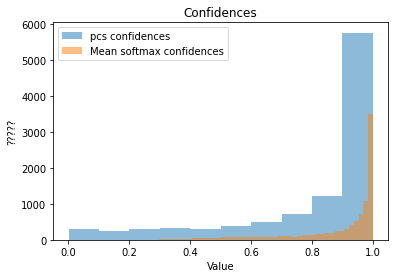

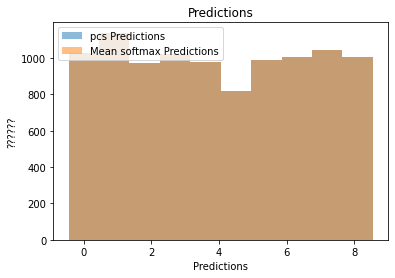

In [9]:
quantifiers = ['pcs', 'mean_softmax']
results = model.predict_quantified(x_test,
                                   quantifier=quantifiers,
                                   batch_size=64,
                                   sample_size=32,
                                   verbose=1)


pcs_predictions = results[0][0]
pcs_confidences = results[0][1]
mean_softmax_predictions = results[1][0]
mean_softmax_confidences = results[1][1]

plt.hist(pcs_confidences, alpha=0.5, label='pcs confidences')
plt.hist(mean_softmax_confidences, bins=50, alpha=0.5, label='Mean softmax confidences')
plt.xlabel('Value')
plt.ylabel('?????')
plt.title('Confidences')
plt.legend()
plt.show()

plt.hist(pcs_predictions, alpha=0.5, label='pcs Predictions', align='left')
plt.hist(mean_softmax_predictions, alpha=0.5, label='Mean softmax Predictions', align='left')
plt.xlabel('Predictions')
plt.ylabel('??????')
plt.title('Predictions')
plt.legend()
plt.show()